In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1️⃣ Load & Explore the Data

In [10]:
# Load the processed dataset
data_path = "../data/processed/gold_prices_cleaned.csv"
df = pd.read_csv(data_path, parse_dates=["date"])

In [12]:
# Display dataset info
print("✅ Dataset Loaded Successfully!")
df.info()
df.describe()

✅ Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3653 non-null   datetime64[ns]
 1   sell                3653 non-null   float64       
 2   buy                 3653 non-null   float64       
 3   sell_ma7            3647 non-null   float64       
 4   sell_ma30           3624 non-null   float64       
 5   sell_ma365          3289 non-null   float64       
 6   price_change_pct    3653 non-null   float64       
 7   sell_volatility_30  3653 non-null   float64       
 8   day_of_week         3653 non-null   int64         
 9   quarter             3653 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 285.5 KB


d:\ngoding penting\indonesia_gold_price_prediction\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,date,sell,buy,sell_ma7,sell_ma30,sell_ma365,price_change_pct,sell_volatility_30,day_of_week,quarter
count,3653,3653.000000,3653.000000,3647.000000,3624.000000,3289.000000,3653.0,3653.000000,3653.000000,3653.000000
mean,2020-04-22 00:00:00,9147.881194,8792.937586,9139.081829,9109.698859,8791.759972,inf,133.488408,3.000274,2.508349
min,2015-04-23 00:00:00,0.000000,0.000000,5044.285714,5724.000000,6116.438356,-100.0,0.000000,0.000000,1.000000
25%,2017-10-22 00:00:00,7310.000000,7090.000000,7310.000000,7310.000000,7482.602740,0.0,17.290619,1.000000,2.000000
50%,2020-04-22 00:00:00,9180.000000,8840.000000,9170.000000,9155.166667,8937.698630,0.0,62.559397,3.000000,3.000000
75%,2022-10-22 00:00:00,9740.000000,9270.000000,9740.000000,9740.000000,9740.000000,0.0,125.056769,5.000000,4.000000
max,2025-04-22 00:00:00,19710.000000,19110.000000,19072.857143,17558.333333,14199.178082,inf,2059.617892,6.000000,4.000000
std,NaN,2235.434270,2160.728889,2211.456634,2149.900359,1656.089251,NaN,266.162755,2.000479,1.117298


In [13]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 date                    0
sell                    0
buy                     0
sell_ma7                6
sell_ma30              29
sell_ma365            364
price_change_pct        0
sell_volatility_30      0
day_of_week             0
quarter                 0
dtype: int64


## 2️⃣ Gold Price Trends Over Time

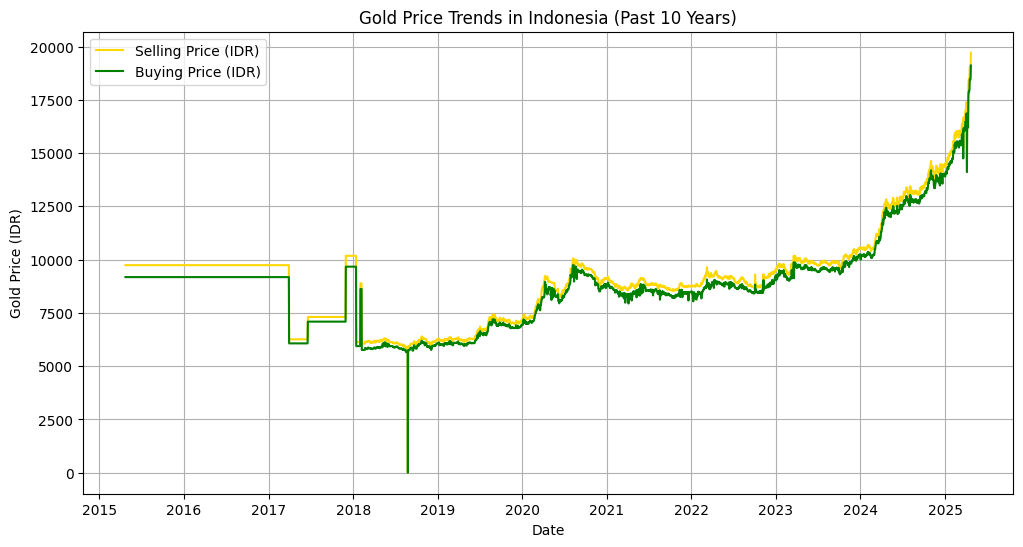

In [14]:
# Plot gold price trends
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["sell"], label="Selling Price (IDR)", color="gold")
plt.plot(df["date"], df["buy"], label="Buying Price (IDR)", color="green")
plt.xlabel("Date")
plt.ylabel("Gold Price (IDR)")
plt.title("Gold Price Trends in Indonesia (Past 10 Years)")
plt.legend()
plt.grid(True)
plt.show()

## 3️⃣ Moving Averages for Trend Analysis

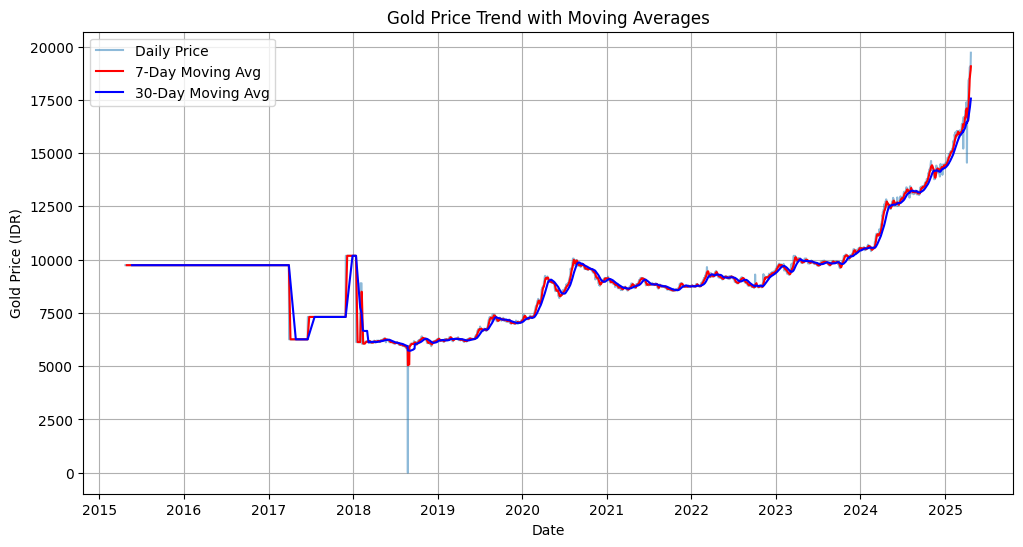

In [15]:
# Plot moving averages for trend analysis
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["sell"], label="Daily Price", alpha=0.5)
plt.plot(df["date"], df["sell_ma7"], label="7-Day Moving Avg", color="red")
plt.plot(df["date"], df["sell_ma30"], label="30-Day Moving Avg", color="blue")
plt.xlabel("Date")
plt.ylabel("Gold Price (IDR)")
plt.title("Gold Price Trend with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()

## 4️⃣ Volatility Analysis

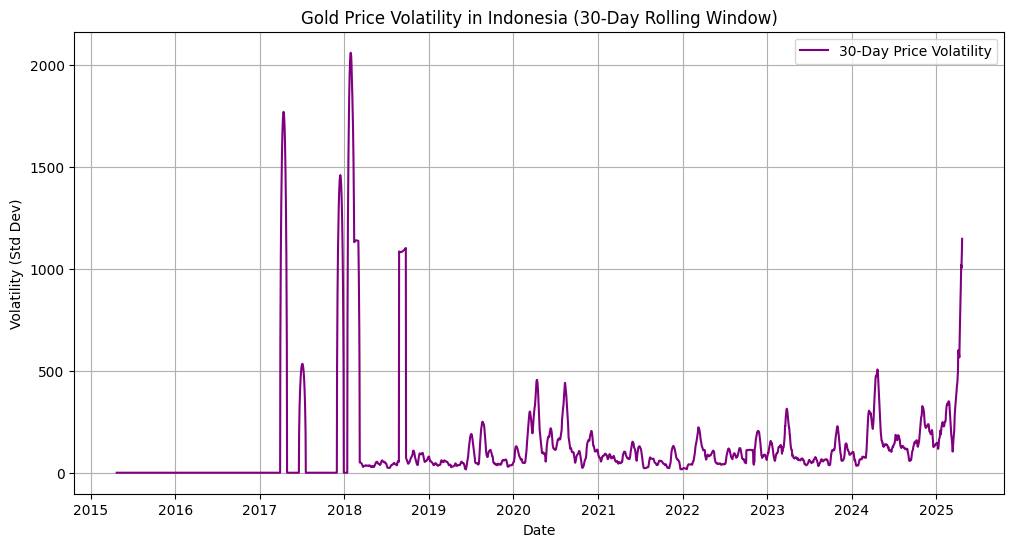

In [16]:
# Plot rolling standard deviation to analyze price volatility
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["sell_volatility_30"], label="30-Day Price Volatility", color="purple")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev)")
plt.title("Gold Price Volatility in Indonesia (30-Day Rolling Window)")
plt.legend()
plt.grid(True)
plt.show()

## 5️⃣ Seasonal Analysis (Monthly Trends)

In [17]:
# Extract monthly averages for seasonal analysis
df["month"] = df["date"].dt.month
monthly_avg = df.groupby("month")["sell"].mean()

C:\Users\erbyl\AppData\Local\Temp\ipykernel_13844\2116118930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues")


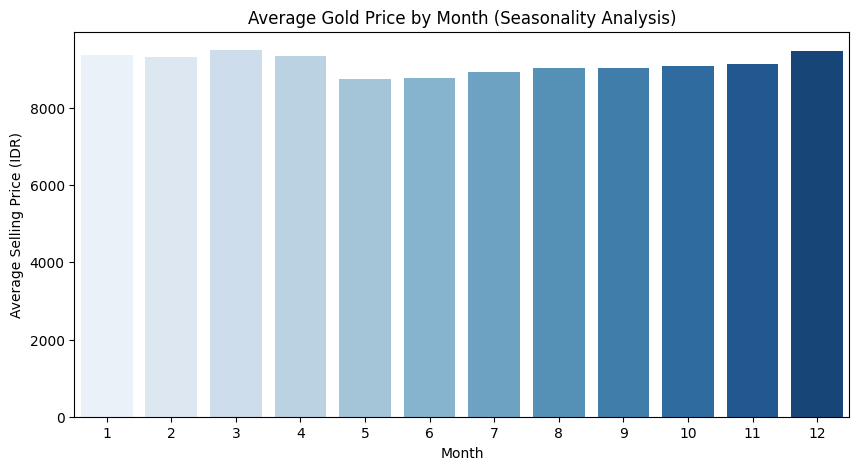

In [18]:
# Bar plot for seasonal trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Average Selling Price (IDR)")
plt.title("Average Gold Price by Month (Seasonality Analysis)")
plt.show()

## 6️⃣ Correlation Analysis

In [19]:
# Compute correlation matrix
correlation_matrix = df.drop(columns=["date"]).corr()

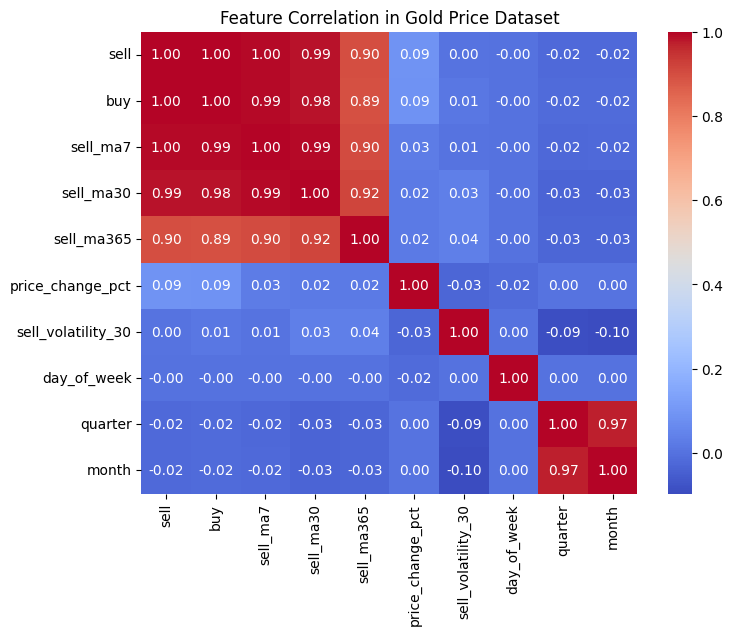

In [20]:
# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation in Gold Price Dataset")
plt.show()